In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
os.chdir('Resources/')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('10_SP_Preprocessed_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.566130,0.602289,-0.617559,1.227344,-0.769996,0.567632,0.850998,-0.006199,-0.865194,-0.722674,1.015783,0
1,-0.163405,-1.660332,-1.039540,0.111470,0.966452,0.567632,0.850998,-0.006199,-0.865194,-0.863679,-0.031283,1
2,-1.566130,0.602289,-0.617559,-1.227933,-0.769996,0.567632,-0.271267,3.512406,-0.865194,-0.722674,1.015783,0
3,-0.163405,-1.660332,1.571612,1.227344,1.468274,0.567632,0.850998,-0.646753,1.155810,-0.556786,-0.031283,1
4,1.255829,0.602289,-1.039540,1.227344,0.966452,0.567632,0.850998,-0.646753,-0.865194,-0.722674,1.015783,0


In [3]:
X = df.drop(['HeartDisease'], axis='columns')
X

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope
0,-1.566130,0.602289,-0.617559,1.227344,-0.769996,0.567632,0.850998,-0.006199,-0.865194,-0.722674,1.015783
1,-0.163405,-1.660332,-1.039540,0.111470,0.966452,0.567632,0.850998,-0.006199,-0.865194,-0.863679,-0.031283
2,-1.566130,0.602289,-0.617559,-1.227933,-0.769996,0.567632,-0.271267,3.512406,-0.865194,-0.722674,1.015783
3,-0.163405,-1.660332,1.571612,1.227344,1.468274,0.567632,0.850998,-0.646753,1.155810,-0.556786,-0.031283
4,1.255829,0.602289,-1.039540,1.227344,0.966452,0.567632,0.850998,-0.646753,-0.865194,-0.722674,1.015783
...,...,...,...,...,...,...,...,...,...,...,...
1817,1.255829,0.602289,-0.617559,-1.227933,-0.769996,0.567632,-0.271267,-0.006199,-0.865194,-0.863679,-1.761837
1818,-0.163405,0.602289,0.257705,-1.227933,1.468274,-1.761705,-0.271267,-0.006199,1.155810,-0.863679,-0.031283
1819,1.255829,0.602289,0.257705,1.227344,1.468274,0.567632,0.850998,-0.646753,1.155810,-0.556786,-1.761837
1820,1.255829,0.602289,-0.617559,0.111470,1.468274,0.567632,0.850998,-0.006199,-0.865194,-0.722674,-1.761837


In [4]:
Y = df[['HeartDisease']]
Y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
1817,0
1818,0
1819,0
1820,0


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 1651
accuracies_dtc = []
positive_predictive_values_dtc = []
recalls_dtc = []
f1_scores_dtc = []
specificities_dtc = []
npvs_dtc = []
plrs_dtc = []
nlrs_dtc = []
aucs_dtc = []
mccs_dtc = []
balanced_accuracies_dtc = []
f2_scores_dtc = []
fprs_dtc = []
fnrs_dtc = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    dtc = DecisionTreeClassifier(random_state=seed)

    model_dtc = dtc.fit(X_train, Y_train)
    pred_dtc = model_dtc.predict(X_test)

    cm_dtc = confusion_matrix(Y_test, pred_dtc)
    tn, fp, fn, tp = cm_dtc.ravel()

    accuracy_dtc = accuracy_score(Y_test, pred_dtc)
    accuracies_dtc.append(accuracy_dtc)    

    ppv_dtc = precision_score(Y_test, pred_dtc)
    positive_predictive_values_dtc.append(ppv_dtc)    

    recall_dtc = recall_score(Y_test, pred_dtc)
    recalls_dtc.append(recall_dtc)    

    f1_score_dtc = f1_score(Y_test, pred_dtc)
    f1_scores_dtc.append(f1_score_dtc)    

    specificity_dtc = tn / (tn + fp)
    specificities_dtc.append(specificity_dtc)

    npv_dtc = tn / (tn + fn)
    npvs_dtc.append(npv_dtc)

    plr_dtc = recall_dtc / (1 - specificity_dtc)
    plrs_dtc.append(plr_dtc)

    nlr_dtc = (1 - recall_dtc) / specificity_dtc
    nlrs_dtc.append(nlr_dtc)

    pred_dtc_proba = model_dtc.predict_proba(X_test)[:, 1] if hasattr(model_dtc, "predict_proba") else None
    if pred_dtc_proba is not None:
        auc_dtc = roc_auc_score(Y_test, pred_dtc_proba)
    else:
        auc_dtc = 0.0
    aucs_dtc.append(auc_dtc)

    mcc_dtc = matthews_corrcoef(Y_test, pred_dtc)
    mccs_dtc.append(mcc_dtc)

    balanced_accuracy_dtc = balanced_accuracy_score(Y_test, pred_dtc)
    balanced_accuracies_dtc.append(balanced_accuracy_dtc)

    f2_score_dtc = fbeta_score(Y_test, pred_dtc, beta=2)
    f2_scores_dtc.append(f2_score_dtc)

    fpr_dtc = fp / (fp + tn)
    fprs_dtc.append(fpr_dtc)

    fnr_dtc = fn / (fn + tp)
    fnrs_dtc.append(fnr_dtc)

print("accuracies_dtc: ", accuracies_dtc)
print("positive_predictive_values_dtc: ", positive_predictive_values_dtc)
print("recalls_dtc: ", recalls_dtc)
print("f1_scores_dtc: ", f1_scores_dtc)
print("specificities_dtc: ", specificities_dtc)
print("npvs_dtc: ", npvs_dtc)
print("plrs_dtc: ", plrs_dtc)
print("nlrs_dtc: ", nlrs_dtc)
print("aucs_dtc: ", aucs_dtc)
print("mccs_dtc: ", mccs_dtc)
print("balanced_accuracies_dtc: ", balanced_accuracies_dtc)
print("f2_scores_dtc: ", f2_scores_dtc)
print("fprs_dtc: ", fprs_dtc)
print("fnrs_dtc: ", fnrs_dtc)

accuracies_dtc:  [0.7774390243902439, 0.7866941015089163, 0.7789968652037618, 0.7897623400365631, 0.7925356750823271, 0.7860082304526749, 0.8171846435100548, 0.810958904109589, 0.8469945355191257]
positive_predictive_values_dtc:  [0.7987421383647799, 0.8049065420560748, 0.7984084880636605, 0.8241935483870968, 0.8356164383561644, 0.8200934579439252, 0.8726114649681529, 0.8787878787878788, 0.8584070796460177]
recalls_dtc:  [0.8149732620320855, 0.8271308523409364, 0.8224043715846995, 0.8085443037974683, 0.8026315789473685, 0.8162790697674419, 0.8203592814371258, 0.7945205479452054, 0.8899082568807339]
f1_scores_dtc:  [0.806776071995765, 0.8158673771462404, 0.8102288021534321, 0.8162939297124601, 0.8187919463087249, 0.8181818181818182, 0.845679012345679, 0.8345323741007195, 0.8738738738738738]
specificities_dtc:  [0.7276595744680852, 0.7328, 0.7205882352941176, 0.7640692640692641, 0.7783641160949868, 0.7424749163879598, 0.812206572769953, 0.8356164383561644, 0.7837837837837838]
npvs_dtc:  

In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)
from sklearn.model_selection import train_test_split

seed = 1037

accuracies_xgb = []
positive_predictive_values_xgb = []
recalls_xgb = []
f1_scores_xgb = []
specificities_xgb = []
npvs_xgb = []
plrs_xgb = []
nlrs_xgb = []
aucs_xgb = []
mccs_xgb = []
balanced_accuracies_xgb = []
f2_scores_xgb = []
fprs_xgb = []
fnrs_xgb = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
    model_xgb = xgb.fit(X_train, Y_train)
    pred_xgb = model_xgb.predict(X_test)

    cm_xgb = confusion_matrix(Y_test, pred_xgb)
    tn, fp, fn, tp = cm_xgb.ravel()

    accuracy_xgb = accuracy_score(Y_test, pred_xgb)
    accuracies_xgb.append(accuracy_xgb)    

    ppv_xgb = precision_score(Y_test, pred_xgb)
    positive_predictive_values_xgb.append(ppv_xgb)    

    recall_xgb = recall_score(Y_test, pred_xgb)
    recalls_xgb.append(recall_xgb)    

    f1_score_xgb = f1_score(Y_test, pred_xgb)
    f1_scores_xgb.append(f1_score_xgb)    

    specificity_xgb = tn / (tn + fp)
    specificities_xgb.append(specificity_xgb)

    npv_xgb = tn / (tn + fn)
    npvs_xgb.append(npv_xgb)

    plr_xgb = recall_xgb / (1 - specificity_xgb)
    plrs_xgb.append(plr_xgb)

    nlr_xgb = (1 - recall_xgb) / specificity_xgb
    nlrs_xgb.append(nlr_xgb)

    # Compute probabilities for ROC AUC
    pred_xgb_proba = model_xgb.predict_proba(X_test)[:, 1] if hasattr(model_xgb, "predict_proba") else None
    if pred_xgb_proba is not None:
        auc_xgb = roc_auc_score(Y_test, pred_xgb_proba)
    else:
        auc_xgb = 0.0
    aucs_xgb.append(auc_xgb)

    mcc_xgb = matthews_corrcoef(Y_test, pred_xgb)
    mccs_xgb.append(mcc_xgb)

    balanced_accuracy_xgb = balanced_accuracy_score(Y_test, pred_xgb)
    balanced_accuracies_xgb.append(balanced_accuracy_xgb)

    f2_score_xgb = fbeta_score(Y_test, pred_xgb, beta=2)
    f2_scores_xgb.append(f2_score_xgb)

    fpr_xgb = fp / (fp + tn)
    fprs_xgb.append(fpr_xgb)

    fnr_xgb = fn / (fn + tp)
    fnrs_xgb.append(fnr_xgb)

print("accuracies_xgb: ", accuracies_xgb)
print("positive_predictive_values_xgb: ", positive_predictive_values_xgb)
print("recalls_xgb: ", recalls_xgb)
print("f1_scores_xgb: ", f1_scores_xgb)
print("specificities_xgb: ", specificities_xgb)
print("npvs_xgb: ", npvs_xgb)
print("plrs_xgb: ", plrs_xgb)
print("nlrs_xgb: ", nlrs_xgb)
print("aucs_xgb: ", aucs_xgb)
print("mccs_xgb: ", mccs_xgb)
print("balanced_accuracies_xgb: ", balanced_accuracies_xgb)
print("f2_scores_xgb: ", f2_scores_xgb)
print("fprs_xgb: ", fprs_xgb)
print("fnrs_xgb: ", fnrs_xgb)

accuracies_xgb:  [0.8286585365853658, 0.8319615912208504, 0.822884012539185, 0.8409506398537477, 0.8441273326015367, 0.8422496570644719, 0.8592321755027422, 0.873972602739726, 0.8579234972677595]
positive_predictive_values_xgb:  [0.8055290753098189, 0.8023379383634431, 0.8075471698113208, 0.8401206636500754, 0.8467153284671532, 0.8449438202247191, 0.8579881656804734, 0.8744588744588745, 0.8596491228070176]
recalls_xgb:  [0.9164859002169198, 0.9275184275184275, 0.8979020979020979, 0.8912, 0.8888888888888888, 0.8909952606635071, 0.9090909090909091, 0.9223744292237442, 0.9074074074074074]
f1_scores_xgb:  [0.8574327752409944, 0.8603988603988604, 0.8503311258278146, 0.8649068322981367, 0.8672897196261682, 0.8673587081891581, 0.882800608828006, 0.8977777777777778, 0.8828828828828829]
specificities_xgb:  [0.7158774373259053, 0.7111801242236024, 0.7272727272727273, 0.7739872068230277, 0.7840616966580977, 0.7752442996742671, 0.7894736842105263, 0.8013698630136986, 0.7866666666666666]
npvs_xgb: 

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, 
                             balanced_accuracy_score, fbeta_score)

seed = 2419
accuracies_rf = []
positive_predictive_values_rf = []
recalls_rf = []
f1_scores_rf = []
specificities_rf = []
npvs_rf = []
plrs_rf = []
nlrs_rf = []
aucs_rf = []
mccs_rf = []
balanced_accuracies_rf = []
f2_scores_rf = []
fprs_rf = []
fnrs_rf = []

for i in range(1, 10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.1 * i, random_state=seed)

    rf = RandomForestClassifier(random_state=seed)

    model_rf = rf.fit(X_train, Y_train)
    pred_rf = model_rf.predict(X_test)

    cm_rf = confusion_matrix(Y_test, pred_rf)
    tn, fp, fn, tp = cm_rf.ravel()

    accuracy_rf = accuracy_score(Y_test, pred_rf)
    accuracies_rf.append(accuracy_rf)    

    ppv_rf = precision_score(Y_test, pred_rf)
    positive_predictive_values_rf.append(ppv_rf)    

    recall_rf = recall_score(Y_test, pred_rf)
    recalls_rf.append(recall_rf)    

    f1_score_rf = f1_score(Y_test, pred_rf)
    f1_scores_rf.append(f1_score_rf)    

    specificity_rf = tn / (tn + fp)
    specificities_rf.append(specificity_rf)

    npv_rf = tn / (tn + fn)
    npvs_rf.append(npv_rf)

    plr_rf = recall_rf / (1 - specificity_rf)
    plrs_rf.append(plr_rf)

    nlr_rf = (1 - recall_rf) / specificity_rf
    nlrs_rf.append(nlr_rf)

    # Compute probabilities for ROC AUC
    pred_rf_proba = model_rf.predict_proba(X_test)[:, 1] if hasattr(model_rf, "predict_proba") else None
    if pred_rf_proba is not None:
        auc_rf = roc_auc_score(Y_test, pred_rf_proba)
    else:
        auc_rf = 0.0
    aucs_rf.append(auc_rf)

    mcc_rf = matthews_corrcoef(Y_test, pred_rf)
    mccs_rf.append(mcc_rf)

    balanced_accuracy_rf = balanced_accuracy_score(Y_test, pred_rf)
    balanced_accuracies_rf.append(balanced_accuracy_rf)

    f2_score_rf = fbeta_score(Y_test, pred_rf, beta=2)
    f2_scores_rf.append(f2_score_rf)

    fpr_rf = fp / (fp + tn)
    fprs_rf.append(fpr_rf)

    fnr_rf = fn / (fn + tp)
    fnrs_rf.append(fnr_rf)

print("accuracies_rf: ", accuracies_rf)
print("positive_predictive_values_rf: ", positive_predictive_values_rf)
print("recalls_rf: ", recalls_rf)
print("f1_scores_rf: ", f1_scores_rf)
print("specificities_rf: ", specificities_rf)
print("npvs_rf: ", npvs_rf)
print("plrs_rf: ", plrs_rf)
print("nlrs_rf: ", nlrs_rf)
print("aucs_rf: ", aucs_rf)
print("mccs_rf: ", mccs_rf)
print("balanced_accuracies_rf: ", balanced_accuracies_rf)
print("f2_scores_rf: ", f2_scores_rf)
print("fprs_rf: ", fprs_rf)
print("fnrs_rf: ", fnrs_rf)

accuracies_rf:  [0.7957317073170732, 0.8257887517146777, 0.829153605015674, 0.840036563071298, 0.8518111964873765, 0.8573388203017832, 0.870201096892139, 0.8986301369863013, 0.9344262295081968]
positive_predictive_values_rf:  [0.8228941684665226, 0.8319907940161104, 0.8361508452535761, 0.8407079646017699, 0.8517179023508138, 0.8698630136986302, 0.873900293255132, 0.9035087719298246, 0.9344262295081968]
recalls_rf:  [0.8167202572347267, 0.8700361010830325, 0.8748299319727891, 0.8948194662480377, 0.898854961832061, 0.8901869158878505, 0.9141104294478528, 0.9321266968325792, 0.9661016949152542]
f1_scores_rf:  [0.8197955890263583, 0.8505882352941176, 0.8550531914893617, 0.8669201520912547, 0.8746518105849582, 0.8799076212471132, 0.8935532233883059, 0.9175946547884187, 0.95]
specificities_rf:  [0.768033946251768, 0.7671451355661882, 0.767097966728281, 0.7636761487964989, 0.7881136950904393, 0.8106312292358804, 0.8054298642533937, 0.8472222222222222, 0.8769230769230769]
npvs_rf:  [0.76050420

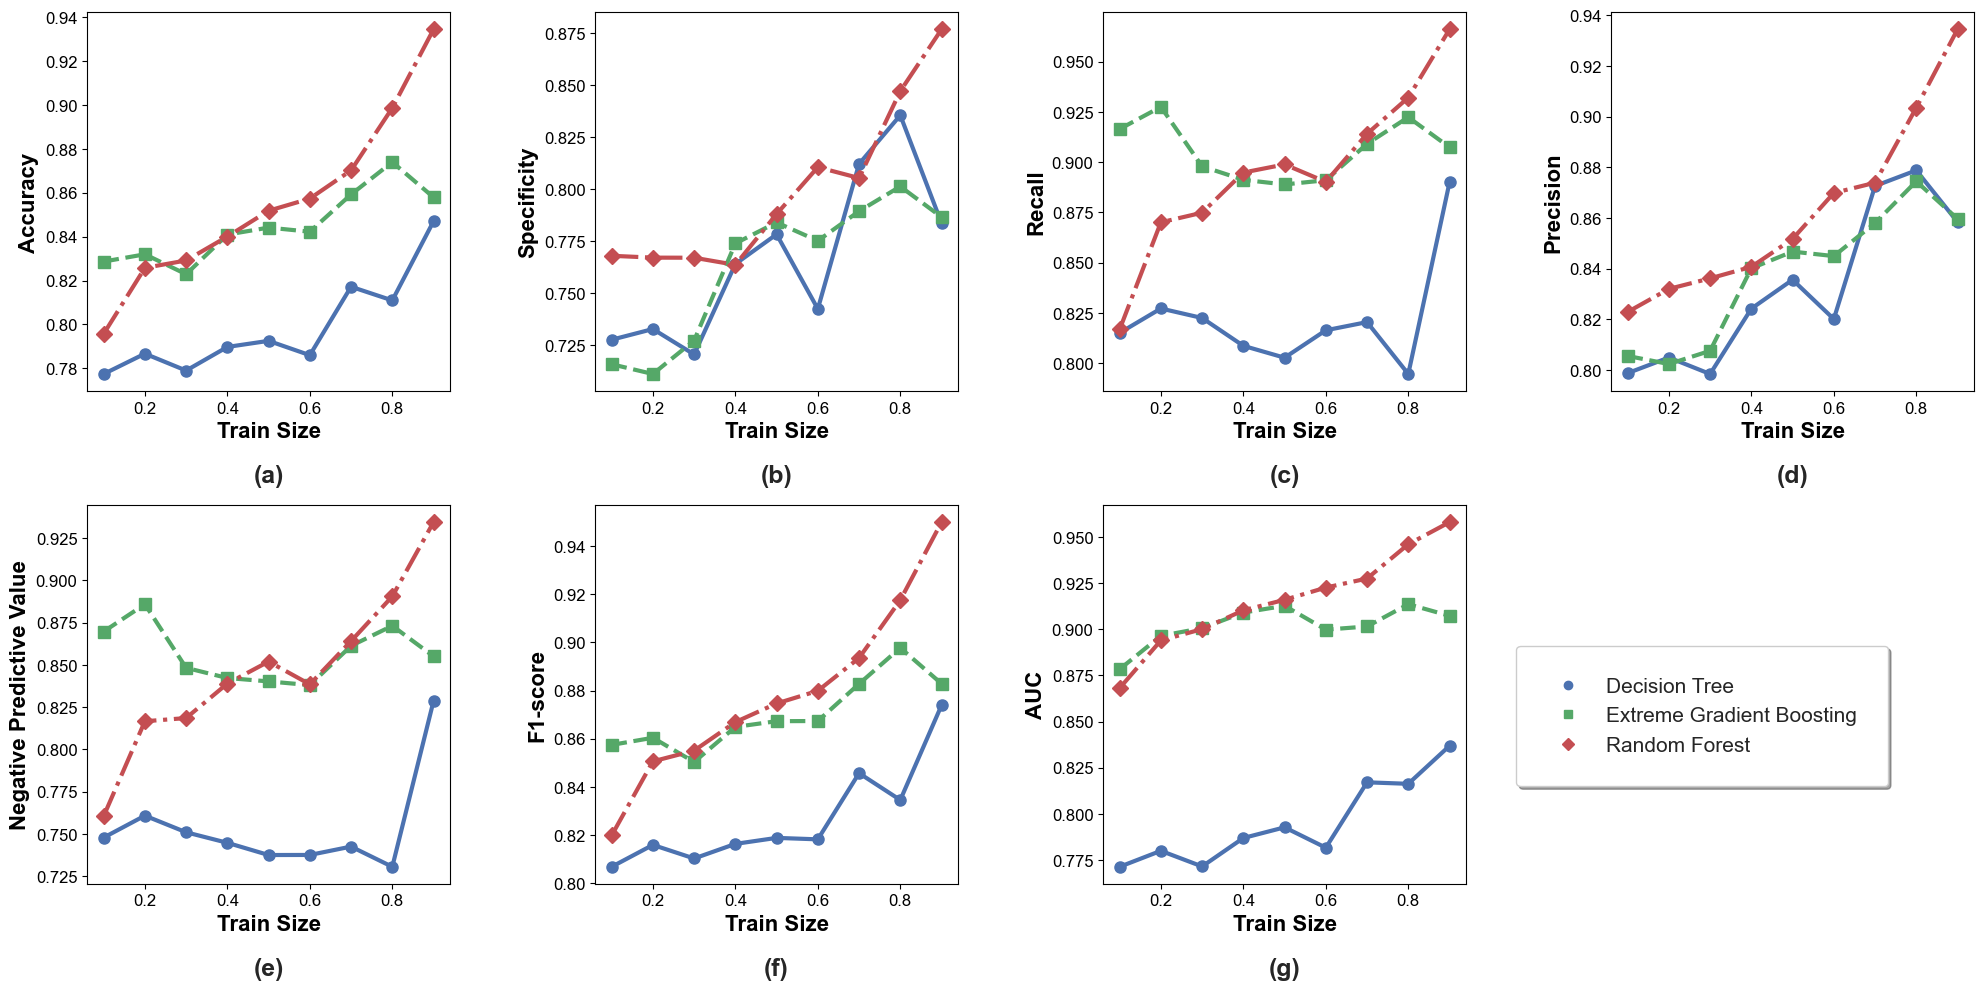

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data
train_sizes = np.linspace(0.1, 0.9, 9)

# Create subplots with 2 rows and 4 columns
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for 2x4 layout
sns.set(style="whitegrid")

# Accuracies
axes[0, 0].plot(train_sizes, accuracies_dtc, marker='o', label='Naive Bayes', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 0].plot(train_sizes, accuracies_xgb, marker='s', label='XGBoost', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 0].plot(train_sizes, accuracies_rf, marker='D', label='Random Forest', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 0].set_ylabel('Accuracy', fontsize=16, fontweight='bold', family='Arial')
axes[0, 0].text(0.5, -0.24, '(a)', transform=axes[0, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Specificities
axes[0, 1].plot(train_sizes, specificities_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 1].plot(train_sizes, specificities_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 1].plot(train_sizes, specificities_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 1].set_ylabel('Specificity', fontsize=16, fontweight='bold', family='Arial')
axes[0, 1].text(0.5, -0.24, '(b)', transform=axes[0, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Recalls
axes[0, 2].plot(train_sizes, recalls_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 2].plot(train_sizes, recalls_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 2].plot(train_sizes, recalls_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 2].set_ylabel('Recall', fontsize=16, fontweight='bold', family='Arial')
axes[0, 2].text(0.5, -0.24, '(c)', transform=axes[0, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Positive Predictive Values
axes[0, 3].plot(train_sizes, positive_predictive_values_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[0, 3].plot(train_sizes, positive_predictive_values_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[0, 3].plot(train_sizes, positive_predictive_values_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[0, 3].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[0, 3].set_ylabel('Precision', fontsize=16, fontweight='bold', family='Arial')
axes[0, 3].text(0.5, -0.24, '(d)', transform=axes[0, 3].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# NPVs
axes[1, 0].plot(train_sizes, npvs_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 0].plot(train_sizes, npvs_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 0].plot(train_sizes, npvs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 0].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 0].set_ylabel('Negative Predictive Value', fontsize=16, fontweight='bold', family='Arial')
axes[1, 0].text(0.5, -0.24, '(e)', transform=axes[1, 0].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# F1 Scores
axes[1, 1].plot(train_sizes, f1_scores_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 1].plot(train_sizes, f1_scores_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 1].plot(train_sizes, f1_scores_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 1].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 1].set_ylabel('F1-score', fontsize=16, fontweight='bold', family='Arial')
axes[1, 1].text(0.5, -0.24, '(f)', transform=axes[1, 1].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# AUCs
axes[1, 2].plot(train_sizes, aucs_dtc, marker='o', linestyle='-', color='b', markersize=8, linewidth=3)
axes[1, 2].plot(train_sizes, aucs_xgb, marker='s', linestyle='--', color='g', markersize=8, linewidth=3)
axes[1, 2].plot(train_sizes, aucs_rf, marker='D', linestyle='-.', color='r', markersize=8, linewidth=3)
axes[1, 2].set_xlabel('Train Size', fontsize=16, fontweight='bold', family='Arial')
axes[1, 2].set_ylabel('AUC', fontsize=16, fontweight='bold', family='Arial')
axes[1, 2].text(0.5, -0.24, '(g)', transform=axes[1, 2].transAxes, fontsize=18, fontweight='bold', ha='center', family='Arial')

# Hide the last unused subplot
axes[1, 3].axis('off')

# Create a dummy plot for the legend
dummy_plot = fig.add_subplot(1, 1, 1, frameon=False)
dummy_plot.plot([], [], 'o', label='Decision Tree', color='b')
dummy_plot.plot([], [], 's', label='Extreme Gradient Boosting', color='g')
dummy_plot.plot([], [], 'D', label='Random Forest', color='r')
dummy_plot.legend(loc='lower right', bbox_to_anchor=(0.96, 0.1), frameon=True, fancybox=True, shadow=True, borderpad=1.5, prop={'size': 15, 'family': 'Arial'})
dummy_plot.axis('off')

# Adjust tick label font size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=12)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.4, hspace=0.3)
plt.savefig('Images/11_SP_ml_classifier_metrics_2x4.jpeg', transparent=True)
plt.show()

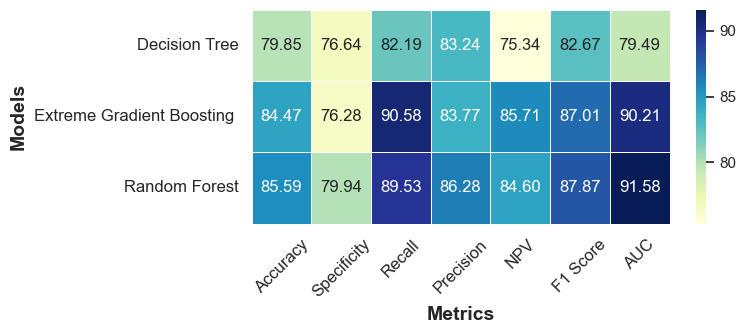

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Times New Roman as the default font
plt.rcParams.update({"font.family": "Arial"})

# Example performance metrics
models = ["Decision Tree", "Extreme Gradient Boosting ", "Random Forest"]

# Replace these lists with your actual performance metrics
data = {
    "Accuracy": [
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_xgb) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_xgb) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_xgb) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
    ],
    "Precision": [
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_xgb) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_xgb) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_xgb) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_xgb) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
    ],
}

# Create a DataFrame
performance_df = pd.DataFrame(data, index=models)

# Round values to 2 decimal places
performance_df = performance_df.round(2)

# Plot heatmap
plt.figure(figsize=(8, 3.5))
sns.heatmap(
    performance_df, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, linewidths=0.5
)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Models", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("Images/11_SP_ml_model_performance_heatmap_with_ppv_npv.jpeg", transparent=True)
plt.show()


In [10]:
data = {
    "Accuracy": [
        sum(accuracies_dtc) * 100 / 9,
        sum(accuracies_xgb) * 100 / 9,
        sum(accuracies_rf) * 100 / 9,
    ],
    "Specificity": [
        sum(specificities_dtc) * 100 / 9,
        sum(specificities_xgb) * 100 / 9,
        sum(specificities_rf) * 100 / 9,
    ],
    "Recall": [
        sum(recalls_dtc) * 100 / 9,
        sum(recalls_xgb) * 100 / 9,
        sum(recalls_rf) * 100 / 9,
    ],
    "PPV": [
        sum(positive_predictive_values_dtc) * 100 / 9,
        sum(positive_predictive_values_xgb) * 100 / 9,
        sum(positive_predictive_values_rf) * 100 / 9,
    ],
    "NPV": [
        sum(npvs_dtc) * 100 / 9,
        sum(npvs_xgb) * 100 / 9,
        sum(npvs_rf) * 100 / 9,
    ],
    "F1 Score": [
        sum(f1_scores_dtc) * 100 / 9,
        sum(f1_scores_xgb) * 100 / 9,
        sum(f1_scores_rf) * 100 / 9,
    ],
    "AUC": [
        sum(aucs_dtc) * 100 / 9,
        sum(aucs_xgb) * 100 / 9,
        sum(aucs_rf) * 100 / 9,
    ],
}

data

{'Accuracy': [79.85082577570284, 84.46622272639317, 85.59020119216133],
 'Specificity': [76.63958779138129, 76.2792633985391, 79.93636983408611],
 'Recall': [82.18612805258961, 90.57625912124337, 89.53096061615761],
 'PPV': [83.24185596193057, 83.76989065303218, 86.27955536756195],
 'NPV': [75.34372772696389, 85.70835579658326, 84.60092712782506],
 'F1 Score': [82.66916895354126, 87.01310323410888, 87.86738308788765],
 'AUC': [79.49152696192438, 90.2145870375513, 91.58345569619422]}